### IMDB Review Sentiment Classification using RNN LSTM

In [1]:
!pip install tensorflow-gpu

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
tf.__version__

'2.0.0'

### Dataset preprocessing 

In [0]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 20000)

In [5]:
len(X_train[1111])

694

In [0]:
X_train = pad_sequences(X_train, maxlen = 1000)
X_test = pad_sequences(X_test, maxlen = 1000)

In [7]:
X_train.shape[1]

1000

In [0]:
vocab_size = 20000
embed_size = 128

In [0]:
#Build LSTM Network

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding

In [0]:
model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_shape = (X_train.shape[1],)))
model.add(LSTM(units=60, activation='tanh'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 128)         2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 60)                45360     
_________________________________________________________________
dense (Dense)                (None, 1)                 61        
Total params: 2,605,421
Trainable params: 2,605,421
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 57s 2ms/sample - loss: 0.3939 - accuracy: 0.8209 - val_loss: 0.3138 - val_accuracy: 0.8694
Epoch 2/5
25000/25000 [==============================] - 52s 2ms/sample - loss: 0.2345 - accuracy: 0.9131 - val_loss: 0.3233 - val_accuracy: 0.8742
Epoch 3/5
25000/25000 [==============================] - 52s 2ms/sample - loss: 0.1407 - accuracy: 0.9514 - val_loss: 0.3390 - val_accuracy: 0.8738
Epoch 4/5
25000/25000 [==============================] - 52s 2ms/sample - loss: 0.1007 - accuracy: 0.9678 - val_loss: 0.3803 - val_accuracy: 0.8648
Epoch 5/5
25000/25000 [==============================] - 53s 2ms/sample - loss: 0.0708 - accuracy: 0.9770 - val_loss: 0.4583 - val_accuracy: 0.8652


In [14]:
history.history

{'accuracy': [0.82088, 0.91308, 0.95144, 0.96784, 0.977],
 'loss': [0.39385673661231996,
  0.23447243591308595,
  0.140723136510849,
  0.10066481704711915,
  0.07084280880481005],
 'val_accuracy': [0.86944, 0.87424, 0.8738, 0.8648, 0.86516],
 'val_loss': [0.3137537904262543,
  0.3233403644657135,
  0.33895842034339907,
  0.3802832628726959,
  0.4583435499382019]}

In [0]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

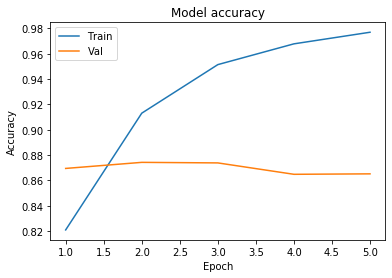

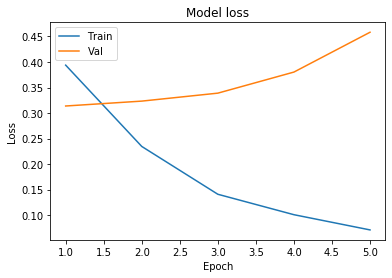

In [16]:
plot_learningCurve(history, 5)